In [1]:
from sympy import *
from openparticle import *
import math

/Users/carterm.gustin/anaconda3/envs/phd/lib/python3.9/site-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


$$
a^n | k \rangle
\ = \ 
\sqrt{\frac{k!}{(k-n)!}}
$$

$$
\langle k | (a^\dagger)^n
\ = \ 
(a^n | k \rangle)^\dagger
\ = \ 
\sqrt{\frac{k!}{(k-n)!}}
$$

In [2]:
def AdagA(n, m, i, j):
    """
    Calculate matrix element <i| (a^\dagger)^n a^m |j>
    """
    if n - m != i - j:
        return S.Zero
    if i - n >= 0:
        h_left = sqrt(factorial(i)/factorial(i-n))
    else:
        h_left = S.Zero
    if j - m >= 0:
        h_right = sqrt(factorial(j)/factorial(j-m))
    else:
        h_right = S.Zero
    return h_left * h_right

In [3]:
N = Symbol('N')

In [4]:
a44 = Matrix( [[ AdagA(N - 4, N - 4, N - 4 + j, N - 4 + i) for j in range(4) ] for i in range(4) ] )
a44

Matrix([
[factorial(N - 4),                0,                  0,                  0],
[               0, factorial(N - 3),                  0,                  0],
[               0,                0, factorial(N - 2)/2,                  0],
[               0,                0,                  0, factorial(N - 1)/6]])

In [5]:
a33 = Matrix( [[ AdagA(N - 3, N - 3, N - 4 + j, N - 4 + i) for j in range(4) ] for i in range(4) ] )
a33

Matrix([
[0,                0,                0,                  0],
[0, factorial(N - 3),                0,                  0],
[0,                0, factorial(N - 2),                  0],
[0,                0,                0, factorial(N - 1)/2]])

In [6]:
a22 = Matrix( [[ AdagA(N - 2, N - 2, N - 4 + j, N - 4 + i) for j in range(4) ] for i in range(4) ] )
a22

Matrix([
[0, 0,                0,                0],
[0, 0,                0,                0],
[0, 0, factorial(N - 2),                0],
[0, 0,                0, factorial(N - 1)]])

In [7]:
a11 = Matrix( [[ AdagA(N - 1, N - 1, N - 4 + j, N - 4 + i) for j in range(4) ] for i in range(4) ] )
a11

Matrix([
[0, 0, 0,                0],
[0, 0, 0,                0],
[0, 0, 0,                0],
[0, 0, 0, factorial(N - 1)]])

In [8]:
a24 = Matrix( [[ AdagA(N - 2, N - 4, N - 4 + j, N - 4 + i) for j in range(4) ] for i in range(4) ] )
a42 = a24.T
a24

Matrix([
[0, 0, sqrt(factorial(N - 4))*sqrt(factorial(N - 2)),                                             0],
[0, 0,                                             0, sqrt(factorial(N - 3))*sqrt(factorial(N - 1))],
[0, 0,                                             0,                                             0],
[0, 0,                                             0,                                             0]])

In [9]:
a13 = Matrix( [[ AdagA(N - 1, N - 3, N - 4 + j, N - 4 + i) for j in range(4) ] for i in range(4) ] )
a31 = a13.T
a13

Matrix([
[0, 0, 0,                                             0],
[0, 0, 0, sqrt(factorial(N - 3))*sqrt(factorial(N - 1))],
[0, 0, 0,                                             0],
[0, 0, 0,                                             0]])

$$
A_{44} (a^\dagger)^{N-4} a^{N-4} + A_{33} (a^\dagger)^{N-3} a^{N-3} + A_{22} (a^\dagger)^{N-2} a^{N-2} + A_{11} (a^\dagger)^{N-1} a^{N-1} + A_{24} \left[ (a^\dagger)^{N-2} a^{N-4} + (a^\dagger)^{N-4} a^{N-2} \right] + A_{13} \left [ (a^\dagger)^{N-1} a^{N-3} + (a^\dagger)^{N-3} a^{N-1} \right]
$$

$A_{33} = -A_{44}$
$A_{22} = A_{22} - A_{44} - A_{33}$

In [10]:
aa44, aa33, aa22, aa11, aa24, aa13 = symbols('A44 A33 A22 A11 A24 A13')
dhh44, dhh22 = symbols('\Delta{}H_{44} \Delta{}H_{22}')

In [11]:
hhp = aa44 * a44 + aa33 * a33 + aa22 * a22 + aa11 * a11 + aa24 * (a24 + a42) + aa13 * (a13 + a31)
hhp.subs(aa33, -aa44)
cancel(hhp.subs(aa33, -aa44).subs(aa13, -aa24).subs(aa44, dhh44/factorial(N-4)).subs(aa22, dhh22/factorial(N-2) + dhh44/2/factorial(N-4))).expand()

Matrix([
[                                   \Delta{}H_{44}, 0, A24*sqrt(factorial(N - 4))*sqrt(factorial(N - 2)),                                                                                                                              0],
[                                                0, 0,                                                 0,                                                                                                                              0],
[A24*sqrt(factorial(N - 4))*sqrt(factorial(N - 2)), 0,                                    \Delta{}H_{22},                                                                                                                              0],
[                                                0, 0,                                                 0, A11*factorial(N - 1) + \Delta{}H_{22}*factorial(N - 1)/factorial(N - 2) + \Delta{}H_{44}*factorial(N - 1)/(6*factorial(N - 4))]])

$H^\prime = A_{44}(N - 4)!(a^\dagger)^{N - 4} a^{N - 4} + (A_{33}(N - 3)! - A_{44}(N - 3)!(a^\dagger)^{N - 3} a^{N - 3}) + \cdots$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# N = 6
# n = N - 1
N = 200
n = 3
g = 1

In [4]:
def one_ge(matrix):
    n = len(matrix) - 1
    A_eff = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            A_eff[i][j] = matrix[i][j] - g * (matrix[i][n] * matrix[n][j])/(matrix[n][n])

    return A_eff

def ge_matrix(matrix, n):

    N = len(matrix)

    for _ in range(N - n):
        matrix = one_ge(matrix)

    return matrix

In [5]:
def calc_the_matrix_elem(k, l, g):
    return (k + 3 * g * (2 * k ** 2 + 2 * k + 1)) * check_delta(k, l) +\
            g * (4 * l + 6) * np.sqrt((l + 1) * (l + 2)) * check_delta(k, l + 2) +\
            g * (4 * k + 6) * np.sqrt((k + 1) * (k + 2)) * check_delta(k + 2, l) +\
            g * np.sqrt((l + 1) * (l + 2) * (l + 3) * (l + 4)) * check_delta(k, l + 4) +\
            g * np.sqrt((k + 1) * (k + 2) * (k + 3) * (k + 4)) * check_delta(k + 4, l) 

def check_delta(k, l):
    if k == l: return 1 
    return 0

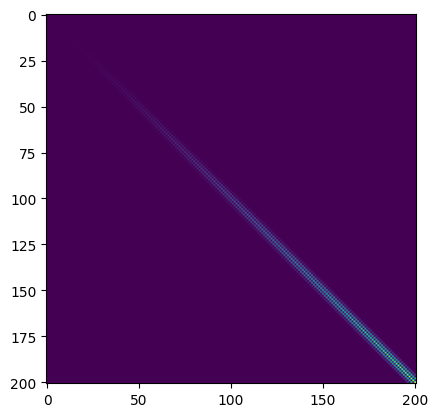

In [6]:
H_from_matrix_elements = np.zeros((N + 1, N + 1))

for i in range(N + 1):
    for j in range(N + 1):
        H_from_matrix_elements[i][j] = calc_the_matrix_elem(i, j, g)
vals, vecs = np.linalg.eigh(H_from_matrix_elements)


Heff = ge_matrix(H_from_matrix_elements, n + 1)

plt.imshow(H_from_matrix_elements)

In [41]:
ge_ground_states = []
ge_first_excited = []
ge_second_excited = []
for n in range(N-1, 3, -1):
    eigvals = np.linalg.eigvalsh(ge_matrix(H_from_matrix_elements, n + 1))
    ge_ground_states.append(eigvals[0])
    ge_first_excited.append(eigvals[1])
    ge_second_excited.append(eigvals[2])

In [71]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18

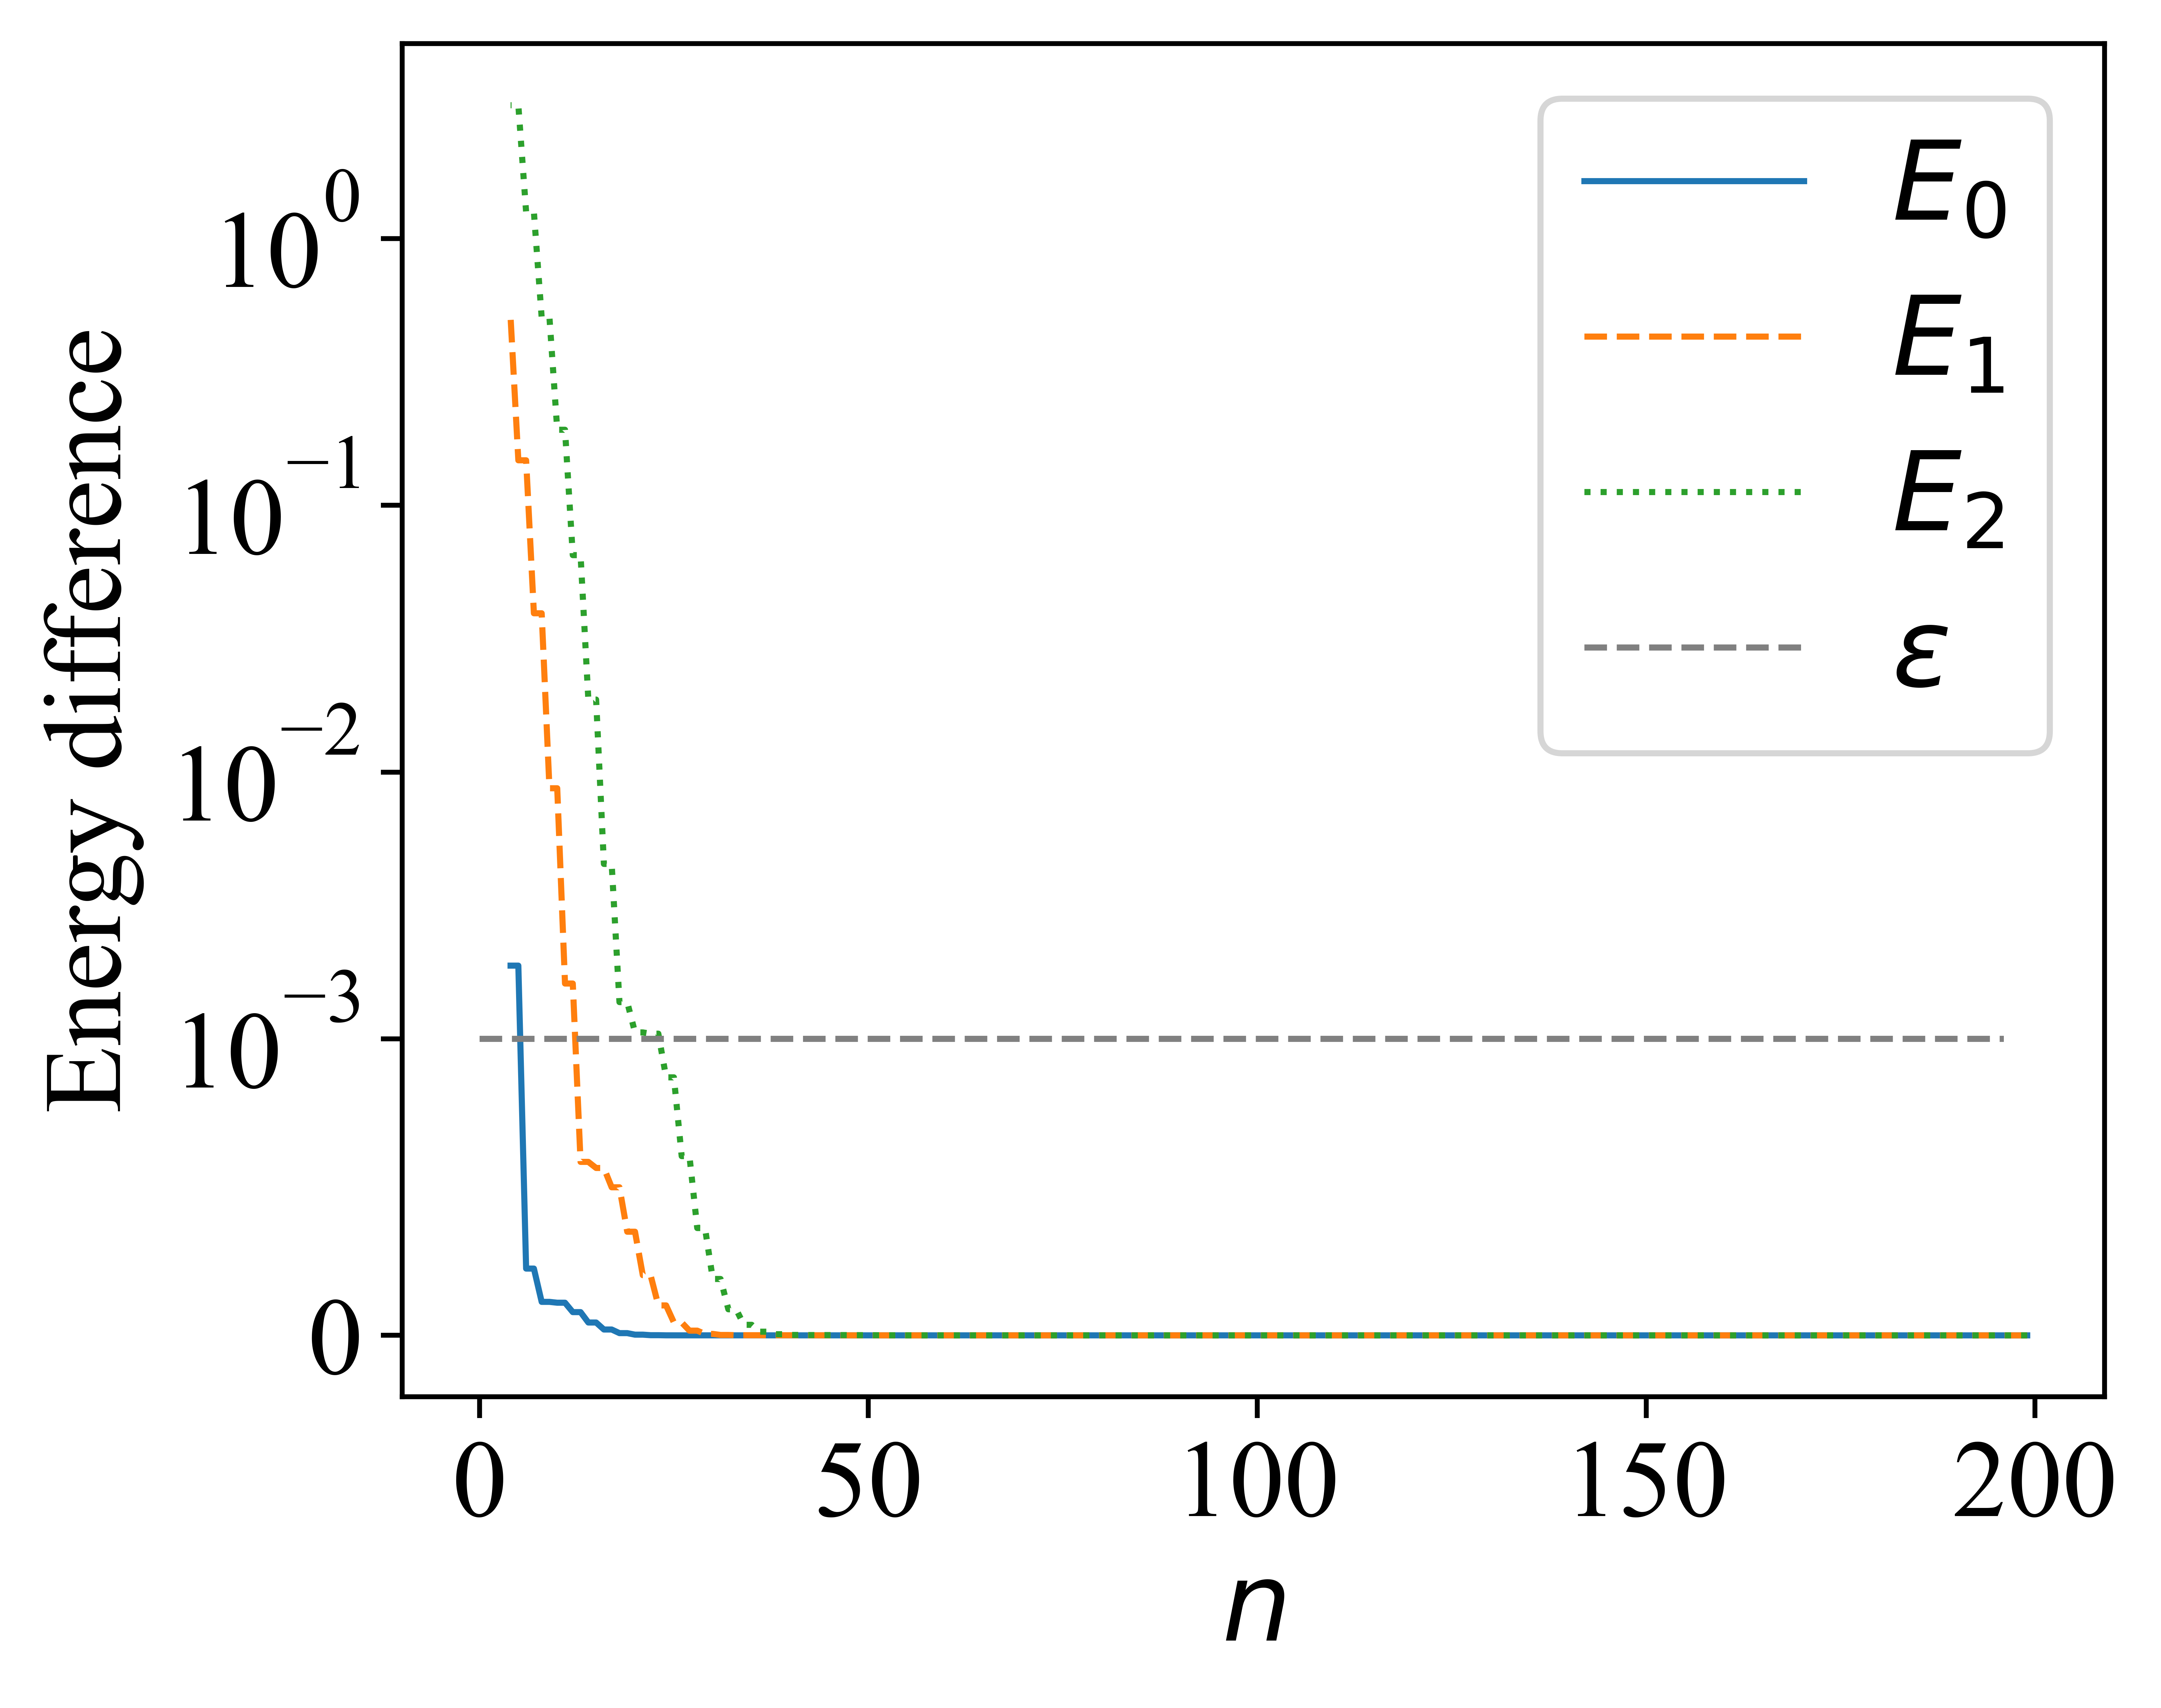

In [98]:
mat_sizes = np.arange(N-1, 3, -1)
linthresh = 1e-3
linewidth = 1
plt.figure(figsize=(5,4), dpi = 1300)
plt.plot(mat_sizes, np.array(ge_ground_states)-np.array([ge_ground_states[0]]*len(mat_sizes)), linewidth = linewidth, label = r'$E_0$')
plt.plot(mat_sizes, np.array(ge_first_excited)-np.array([ge_first_excited[0]]*len(mat_sizes)), linewidth = linewidth, linestyle = '--', label = r'$E_1$')
plt.plot(mat_sizes, np.array(ge_second_excited)-np.array([ge_second_excited[0]]*len(mat_sizes)), linewidth = linewidth, linestyle = ':', label = r'$E_2$')
plt.hlines(linthresh, 0, len(mat_sizes), color = 'grey', linestyle = '--', linewidth = linewidth, label = r'$\epsilon$'
           )
plt.legend()
plt.ylabel(r'Energy difference')
plt.xlabel(r'$n$')
plt.yscale('symlog', linthresh = linthresh)
# plt.ylim(1e-12, 10)
# plt.ylim(0, 1)

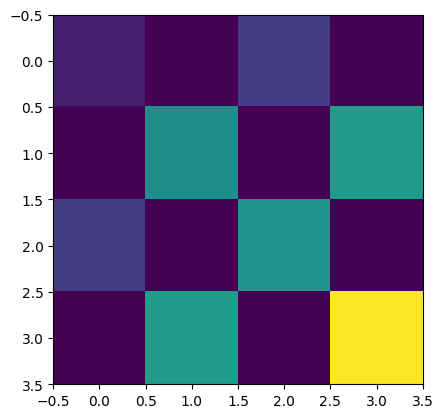

In [7]:
plt.imshow(Heff)


$H = a^\dagger a + g(a + a^\dagger)^4$

In [18]:
basis_states = [Fock([], [], [(0, l)]) for l in range(N + 1)]

In [19]:
H = ParticleOperator('a0^ a0') + g * (ParticleOperator('a0^') + ParticleOperator('a0'))**4

In [20]:
H.display()

<IPython.core.display.Latex object>

In [21]:
from openparticle.utils import generate_matrix

In [22]:
H_from_op = generate_matrix(H, basis_states)

In [23]:
def delta_H(i, j):
    return (Heff[:,:])[i,j] - H_from_op[i,j]

In [24]:
# H_eff_op = H+(
#         delta_H(n + 1-4, n + 1-4) / math.factorial(n + 1 - 4) * ParticleOperator('a0^') ** (n + 1 - 4) * ParticleOperator('a0') ** (n + 1 - 4) - 
#         delta_H(n + 1-4, n + 1-4) / math.factorial(n + 1 - 4) * (ParticleOperator('a0^') ** (n + 1 - 3) * ParticleOperator('a0') ** (n + 1 - 3)) +
#         delta_H(n + 1-4, n + 1-4) / (2 * math.factorial(n + 1 - 4)) * (ParticleOperator('a0^') ** (n + 1 - 2) * ParticleOperator('a0') ** (n + 1 - 2)) -
#         delta_H(n + 1-4, n + 1-4) / (6 * math.factorial(n + 1 - 4)) * (ParticleOperator('a0^') ** (n + 1 - 1) * ParticleOperator('a0') ** (n + 1 - 1)) + 
#         delta_H(n + 1-2, n + 1-2) / math.factorial(n + 1 - 2) * (ParticleOperator('a0^') ** (n + 1 - 2) * ParticleOperator('a0') ** (n + 1 - 2)) -
#         delta_H(n + 1-2, n + 1-2) / math.factorial(n + 1 - 2) * (ParticleOperator('a0^') ** (n + 1 - 1) * ParticleOperator('a0') ** (n + 1 - 1)) + 
#         (delta_H(n + 1-4, n + 1-2) / np.sqrt(math.factorial(n + 1 - 4) * math.factorial(n + 1 - 2))) * (
#             ParticleOperator('a0^') ** (n + 1 - 4) * ParticleOperator('a0') ** (n + 1 - 2) - ParticleOperator('a0^') ** (n + 1 - 3) * ParticleOperator('a0') ** (n + 1 - 1)
#         ) +
#         (delta_H(n + 1-2, n + 1-4) / np.sqrt(math.factorial(n + 1 - 4) * math.factorial(n + 1 - 2))) * (
#             ParticleOperator('a0^') ** (n + 1 - 2) * ParticleOperator('a0') ** (n + 1 - 4) - ParticleOperator('a0^') ** (n + 1 - 1) * ParticleOperator('a0') ** (n + 1 - 3)
#         ) + 
#         delta_H(n + 2-4, n + 2-4) / math.factorial(n + 2 - 4) * ParticleOperator('a0^') ** (n + 2 - 4) * ParticleOperator('a0') ** (n + 2 - 4) - 
#         delta_H(n + 2-4, n + 2-4) / math.factorial(n + 2 - 4) * (ParticleOperator('a0^') ** (n + 2 - 3) * ParticleOperator('a0') ** (n + 2 - 3)) +
#         delta_H(n + 2-4, n + 2-4) / (2 * math.factorial(n + 2 - 4)) * (ParticleOperator('a0^') ** (n + 2 - 2) * ParticleOperator('a0') ** (n + 2 - 2)) -
#         delta_H(n + 2-4, n + 2-4) / (6 * math.factorial(n + 2 - 4)) * (ParticleOperator('a0^') ** (n + 2 - 1) * ParticleOperator('a0') ** (n + 2 - 1)) + 
#         delta_H(n + 2-2, n + 2-2) / math.factorial(n + 2 - 2) * (ParticleOperator('a0^') ** (n + 2 - 2) * ParticleOperator('a0') ** (n + 2 - 2)) -
#         delta_H(n + 2-2, n + 2-2) / math.factorial(n + 2 - 2) * (ParticleOperator('a0^') ** (n + 2 - 1) * ParticleOperator('a0') ** (n + 2 - 1)) + 
#         (delta_H(n + 2-4, n + 2-2) / np.sqrt(math.factorial(n + 2 - 4) * math.factorial(n + 2 - 2))) * (
#             ParticleOperator('a0^') ** (n + 2 - 4) * ParticleOperator('a0') ** (n + 2 - 2) - ParticleOperator('a0^') ** (n + 2 - 3) * ParticleOperator('a0') ** (n + 2 - 1)
#         ) +
#         (delta_H(n + 2-2, n + 2-4) / np.sqrt(math.factorial(n + 2 - 4) * math.factorial(n + 2 - 2))) * (
#             ParticleOperator('a0^') ** (n + 2 - 2) * ParticleOperator('a0') ** (n + 2 - 4) - ParticleOperator('a0^') ** (n + 2 - 1) * ParticleOperator('a0') ** (n + 2 - 3)
#         )
# )


In [25]:
H_eff_op = H + (
    delta_H(n - 3, n - 3) / math.factorial(n - 3) * ParticleOperator('a0^') ** (n - 3) * ParticleOperator('a0') ** (n - 3) - 
    delta_H(n - 3, n - 3) / math.factorial(n - 3) * (ParticleOperator('a0^') ** (n - 2) * ParticleOperator('a0') ** (n - 2)) +
    delta_H(n - 3, n - 3) / (2 * math.factorial(n - 3)) * (ParticleOperator('a0^') ** (n - 1) * ParticleOperator('a0') ** (n - 1)) -
    delta_H(n - 3, n - 3) / (6 * math.factorial(n - 3)) * (ParticleOperator('a0^') ** n * ParticleOperator('a0') ** n) + 
    delta_H(n - 1, n - 1) / math.factorial(n - 1) * (ParticleOperator('a0^') ** (n - 1) * ParticleOperator('a0') ** (n - 1)) -
    delta_H(n - 1, n - 1) / math.factorial(n - 1) * (ParticleOperator('a0^') ** n * ParticleOperator('a0') ** n) + 
    (delta_H(n - 3, n - 1) / np.sqrt(math.factorial(n - 3) * math.factorial(n - 1))) * (
        ParticleOperator('a0^') ** (n - 3) * ParticleOperator('a0') ** (n - 1) - ParticleOperator('a0^') ** (n - 2) * ParticleOperator('a0') ** n
    ) +
    (delta_H(n - 1, n - 3) / np.sqrt(math.factorial(n - 3) * math.factorial(n - 1))) * (
        ParticleOperator('a0^') ** (n - 1) * ParticleOperator('a0') ** (n - 3) - ParticleOperator('a0^') ** n * ParticleOperator('a0') ** (n - 2)
    ) + 
    delta_H(n - 2, n - 2) / math.factorial(n - 2) * ParticleOperator('a0^') ** (n - 2) * ParticleOperator('a0') ** (n - 2) - 
    delta_H(n - 2, n - 2) / math.factorial(n - 2) * (ParticleOperator('a0^') ** (n - 1) * ParticleOperator('a0') ** (n - 1)) +
    delta_H(n - 2, n - 2) / (2 * math.factorial(n - 2)) * (ParticleOperator('a0^') ** n * ParticleOperator('a0') ** n) -
    delta_H(n - 2, n - 2) / (6 * math.factorial(n - 2)) * (ParticleOperator('a0^') ** (n + 1) * ParticleOperator('a0') ** (n + 1)) + 
    delta_H(n, n) / math.factorial(n) * (ParticleOperator('a0^') ** n * ParticleOperator('a0') ** n) -
    delta_H(n, n) / math.factorial(n) * (ParticleOperator('a0^') ** (n + 1) * ParticleOperator('a0') ** (n + 1)) + 
    (delta_H(n - 2, n) / np.sqrt(math.factorial(n - 2) * math.factorial(n))) * (
        ParticleOperator('a0^') ** (n - 2) * ParticleOperator('a0') ** n - ParticleOperator('a0^') ** (n - 1) * ParticleOperator('a0') ** (n + 1)
    ) +
    (delta_H(n, n - 2) / np.sqrt(math.factorial(n - 2) * math.factorial(n))) * (
        ParticleOperator('a0^') ** n * ParticleOperator('a0') ** (n - 2) - ParticleOperator('a0^') ** (n + 1) * ParticleOperator('a0') ** (n - 1)
    )
)


In [26]:
H_eff_op.op_dict

{'a0^ a0^ a0^ a0^': 1.0,
 'a0^ a0^ a0^ a0': -0.150434313332378,
 'a0^ a0^ a0 a0^': 1.0,
 'a0^ a0^ a0 a0': -10.536050711865201,
 'a0^ a0 a0^ a0^': 1.0,
 'a0^ a0 a0^ a0': 1.0,
 'a0^ a0 a0 a0^': 1.0,
 'a0^ a0 a0 a0': -0.150434313332378,
 'a0 a0^ a0^ a0^': 1.0,
 'a0 a0^ a0^ a0': 1.0,
 'a0 a0^ a0 a0^': 1.0,
 'a0 a0^ a0 a0': 1.0,
 'a0 a0 a0^ a0^': 1.0,
 'a0 a0 a0^ a0': 1.0,
 'a0 a0 a0 a0^': 1.0,
 'a0 a0 a0 a0': 1.0,
 'a0^ a0': -0.26290793192998585,
 ' ': -0.5219744335814394,
 'a0^ a0^ a0^ a0 a0 a0': 3.9998612759007717,
 'a0 a0': -2.4076752409486026,
 'a0^ a0^': -2.4076752409486026,
 'a0^ a0^ a0^ a0^ a0 a0 a0 a0': 8.552119535111565,
 'a0^ a0^ a0 a0 a0 a0': 3.5581095542809806,
 'a0^ a0^ a0^ a0^ a0 a0': 3.5581095542809806}

In [27]:
H_eff_op.normal_order().op_dict

{'a0^ a0^ a0^ a0^': 1.0,
 'a0^ a0^ a0^ a0': 2.849565686667622,
 'a0^ a0^': 3.5923247590513974,
 'a0^ a0^ a0 a0': -5.536050711865201,
 'a0^ a0': 11.737092068070014,
 'a0^ a0 a0 a0': 2.849565686667622,
 ' ': 2.4780255664185606,
 'a0 a0': 3.5923247590513974,
 'a0 a0 a0 a0': 1.0,
 'a0^ a0^ a0^ a0 a0 a0': 3.9998612759007717,
 'a0^ a0^ a0^ a0^ a0 a0 a0 a0': 8.552119535111565,
 'a0^ a0^ a0 a0 a0 a0': 3.5581095542809806,
 'a0^ a0^ a0^ a0^ a0 a0': 3.5581095542809806}

In [28]:
H_eff_op = ParticleOperator({
 'a0^ a0^ a0^ a0': 2.849565686667622,
 'a0^ a0^': 3.5923247590513974,
 'a0^ a0^ a0 a0': -5.536050711865201,
 'a0^ a0': 11.737092068070014,
 'a0^ a0 a0 a0': 2.849565686667622,
 ' ': 2.4780255664185606,
 'a0 a0': 3.5923247590513974,
 'a0^ a0^ a0^ a0 a0 a0': 3.9998612759007717,
 'a0^ a0^ a0 a0 a0 a0': 3.5581095542809806,})

Text(0.5, 1.0, 'Hamiltonian from renormalized ladder ops')

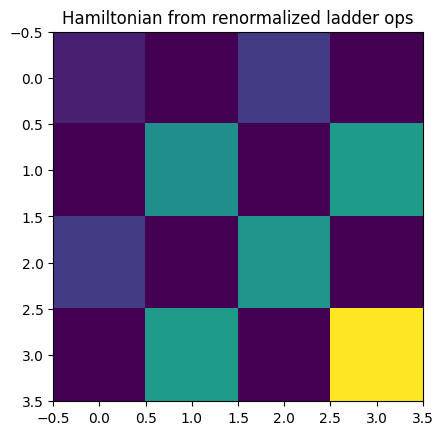

In [29]:
Heff_from_op = generate_matrix(H_eff_op, basis_states[:n + 1])
plt.imshow(Heff_from_op)
plt.title("Hamiltonian from renormalized ladder ops")

Text(0.5, 1.0, 'Hamiltonian from recurssion relation on matrix elements')

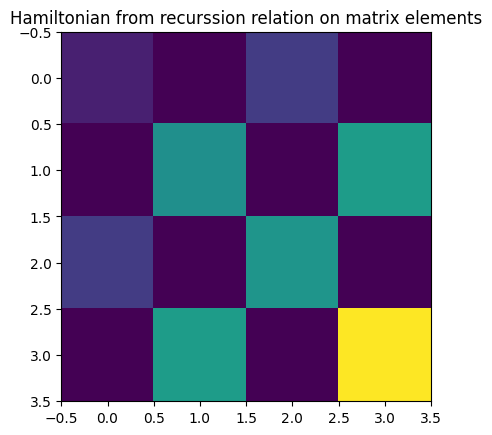

In [30]:
plt.imshow(Heff)
plt.title("Hamiltonian from recurssion relation on matrix elements")

In [31]:
np.allclose(Heff, Heff_from_op, 1e-69)

True

In [32]:
vals, vecs = np.linalg.eigh(H_from_op)
min(vals)

0.6487889141266824

In [33]:
vals, vecs = np.linalg.eigh(Heff_from_op)
min(vals)

0.6626769464339797

In [34]:
def renorm_quartic_osc(N, n, g):
    '''
    Generates the ParticleOperator form for the renormalized quartic oscillator. 

    H = a^a + g(a^ + a)**4

    Parameters:
    N: Cutoff at the large energy scale
    n: Size that H gets renormalized down to i.e. N -> n
    g: coupling

    Returns H_eff
    '''
    basis_states = [Fock([], [], [(0, l)]) for l in range(N + 1)]
    H = ParticleOperator('a0^ a0') + g * (ParticleOperator('a0^') + ParticleOperator('a0'))**4
    H_from_op = generate_matrix(H, basis_states)

    H_eff_op = H + (
    delta_H(n - 3, n - 3) / math.factorial(n - 3) * ParticleOperator('a0^') ** (n - 3) * ParticleOperator('a0') ** (n - 3) - 
    delta_H(n - 3, n - 3) / math.factorial(n - 3) * (ParticleOperator('a0^') ** (n - 2) * ParticleOperator('a0') ** (n - 2)) +
    delta_H(n - 3, n - 3) / (2 * math.factorial(n - 3)) * (ParticleOperator('a0^') ** (n - 1) * ParticleOperator('a0') ** (n - 1)) -
    delta_H(n - 3, n - 3) / (6 * math.factorial(n - 3)) * (ParticleOperator('a0^') ** n * ParticleOperator('a0') ** n) + 
    delta_H(n - 1, n - 1) / math.factorial(n - 1) * (ParticleOperator('a0^') ** (n - 1) * ParticleOperator('a0') ** (n - 1)) -
    delta_H(n - 1, n - 1) / math.factorial(n - 1) * (ParticleOperator('a0^') ** n * ParticleOperator('a0') ** n) + 
    (delta_H(n - 3, n - 1) / np.sqrt(math.factorial(n - 3) * math.factorial(n - 1))) * (
        ParticleOperator('a0^') ** (n - 3) * ParticleOperator('a0') ** (n - 1) - ParticleOperator('a0^') ** (n - 2) * ParticleOperator('a0') ** n
    ) +
    (delta_H(n - 1, n - 3) / np.sqrt(math.factorial(n - 3) * math.factorial(n - 1))) * (
        ParticleOperator('a0^') ** (n - 1) * ParticleOperator('a0') ** (n - 3) - ParticleOperator('a0^') ** n * ParticleOperator('a0') ** (n - 2)
    ) + 
    delta_H(n - 2, n - 2) / math.factorial(n - 2) * ParticleOperator('a0^') ** (n - 2) * ParticleOperator('a0') ** (n - 2) - 
    delta_H(n - 2, n - 2) / math.factorial(n - 2) * (ParticleOperator('a0^') ** (n - 1) * ParticleOperator('a0') ** (n - 1)) +
    delta_H(n - 2, n - 2) / (2 * math.factorial(n - 2)) * (ParticleOperator('a0^') ** n * ParticleOperator('a0') ** n) -
    delta_H(n - 2, n - 2) / (6 * math.factorial(n - 2)) * (ParticleOperator('a0^') ** (n + 1) * ParticleOperator('a0') ** (n + 1)) + 
    delta_H(n, n) / math.factorial(n) * (ParticleOperator('a0^') ** n * ParticleOperator('a0') ** n) -
    delta_H(n, n) / math.factorial(n) * (ParticleOperator('a0^') ** (n + 1) * ParticleOperator('a0') ** (n + 1)) + 
    (delta_H(n - 2, n) / np.sqrt(math.factorial(n - 2) * math.factorial(n))) * (
        ParticleOperator('a0^') ** (n - 2) * ParticleOperator('a0') ** n - ParticleOperator('a0^') ** (n - 1) * ParticleOperator('a0') ** (n + 1)
    ) +
    (delta_H(n, n - 2) / np.sqrt(math.factorial(n - 2) * math.factorial(n))) * (
        ParticleOperator('a0^') ** n * ParticleOperator('a0') ** (n - 2) - ParticleOperator('a0^') ** (n + 1) * ParticleOperator('a0') ** (n - 1)
    )
)


    
    return H_eff_op.normal_order()

In [35]:
renorm_quartic_osc(200, 3, 1)

1.0 * a0^ a0^ a0^ a0^
2.849565686667622 * a0^ a0^ a0^ a0
3.5923247590513974 * a0^ a0^
-5.536050711865201 * a0^ a0^ a0 a0
11.737092068070014 * a0^ a0
2.849565686667622 * a0^ a0 a0 a0
2.4780255664185606 *  
3.5923247590513974 * a0 a0
1.0 * a0 a0 a0 a0
3.9998612759007717 * a0^ a0^ a0^ a0 a0 a0
8.552119535111565 * a0^ a0^ a0^ a0^ a0 a0 a0 a0
3.5581095542809806 * a0^ a0^ a0 a0 a0 a0
3.5581095542809806 * a0^ a0^ a0^ a0^ a0 a0